# Домашнее задание 5. Градиентный спуск. (10 баллов + 2 балла бонус)

В этом домашнем задании вы реализуете градиентный спуск для линейной регрессии, а также изучите, как он ведёт себя при разных параметрах и с разными функциями потерь.

Правила:

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания всем участникам нарушения будет выставлено 0 баллов, независимо от того, кто у кого списывал.

* Старайтесь сделать код максимально оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, рассмотренных в курсе.  

In [92]:
from typing import Iterable, List, Any

import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray, dtype, float64

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — **Mean Squared Error (MSE)**:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов.

Чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его **не нужно**. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса.
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять градиент функции потерь по параметрам модели.

In [93]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число - значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`.

Он должен вычислять лосс и градиент по формулам наверху.

In [94]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.linalg.norm(X.dot(w) - y)**2 / X.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2 * X.T.dot(X.dot(w) - y) / X.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [95]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^{t+1} = w^{t} - \eta \nabla_{w} Q(w^{t}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`.

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше, и возвращать
траекторию спуска (список из новых значений весов на каждом шаге).

In [96]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    w_t = w_init.copy()
    weights_on_iterations = [w_t.copy()]
    for _ in range(n_iterations):
        w_t -= lr * loss.calc_grad(X, y, w_t)
        weights_on_iterations.append(w_t.copy())
    return weights_on_iterations

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.

In [97]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [98]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045026
0.8670644395649494


In [99]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # Отображение уровня функции потерь
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Отображение траектории спуска
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте четыре и более различных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска.

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`.
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1.

Learning rate:  0.0001


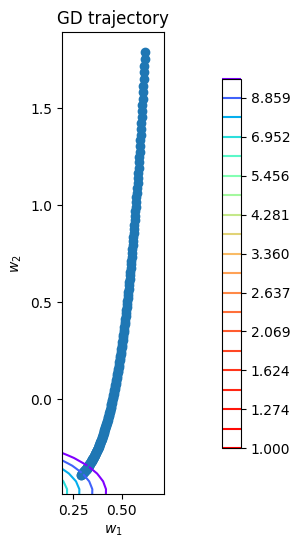

Learning rate:  0.001


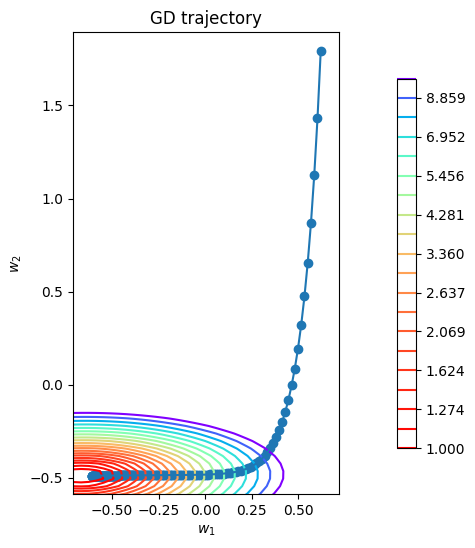

Learning rate:  0.01


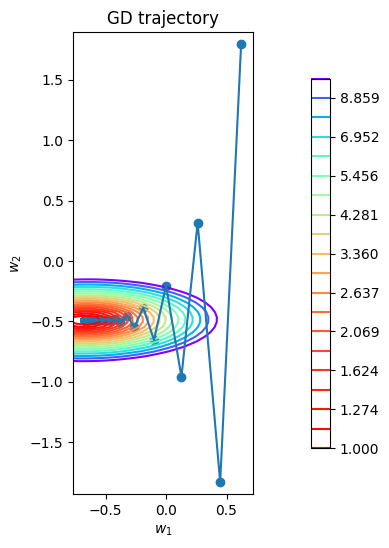

Learning rate:  0.02


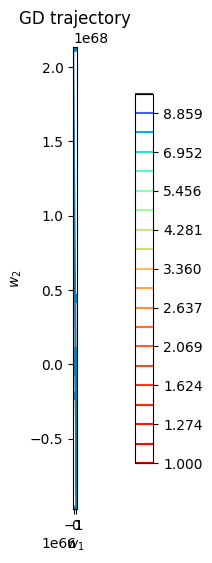

In [100]:
learning_rates = [0.0001, 0.001, 0.01, 0.02]
for lr in learning_rates:
    print("Learning rate: ", lr)
    plot_gd(gradient_descent(w_init, X, y, loss, lr, 200), X, y, loss)

При слишком маленьком lr (у нас это 0.0001) градиентный спуск делает очень маленькие шаги на каждой итерации, да возможно траектория движения более точная, но потребуется значительно большее количество итераций, чтобы достичь минимума. С нашим количеством итераций минимум не достигается (до него еще далеко). Если взять в десять раз больший lr, то заметно, что шаги стали намного больше, но все равно не хватило еще чуть-чуть. При lr = 0.01 все сходится и вероятно за меньшее кол-во итераций, чем выставлено сейчас. Видно, что по началу шаги огромные, а затем все постепенно сходится. Ну и если еще увеличим в два раза, то метод уже не сойдется, так как изначально были сделаны огромные шаги, которые просто перескакивают минимум.

Теперь реализуем стохастический градиентный спуск.

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`.

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [101]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_t = w_init.copy()
    weights_on_iterations = [w_t.copy()]
    batch_size = min(batch_size, X.shape[0])
    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        w_t -= lr * loss.calc_grad(X_batch, y_batch, w_t)
        weights_on_iterations.append(w_t.copy())
    return weights_on_iterations

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного? Что происходит при малых и больших `batch_size`?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

Batch size:  1 Learning rate:  0.0001


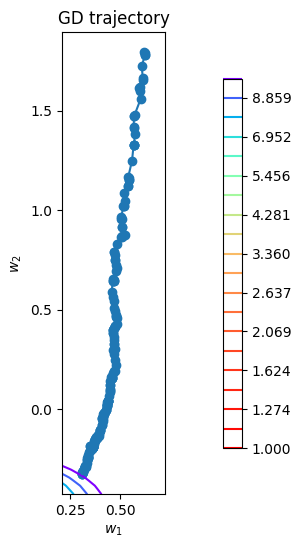

Batch size:  1 Learning rate:  0.001


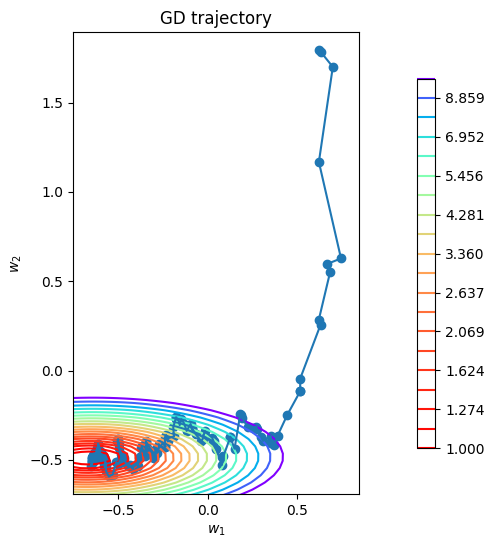

Batch size:  1 Learning rate:  0.01


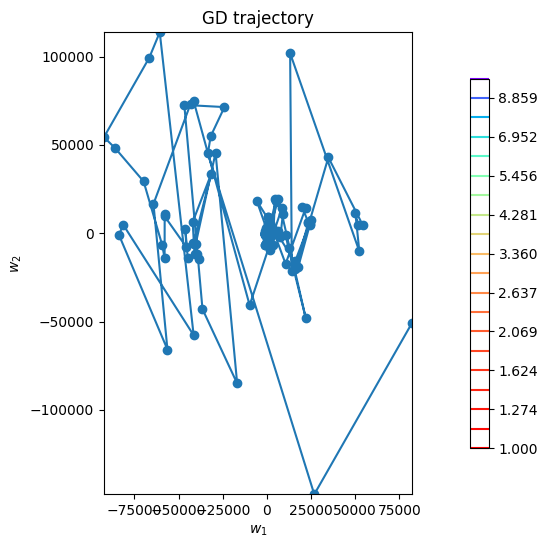

Batch size:  1 Learning rate:  0.02


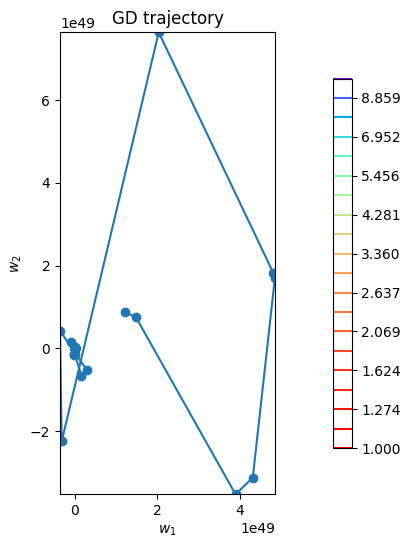

Batch size:  5 Learning rate:  0.0001


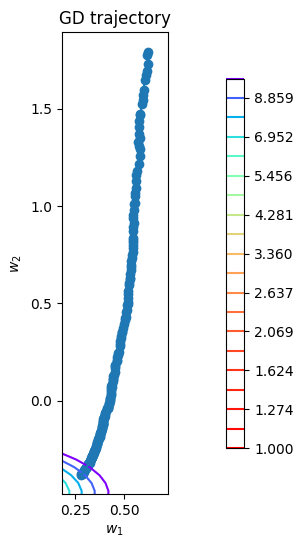

Batch size:  5 Learning rate:  0.001


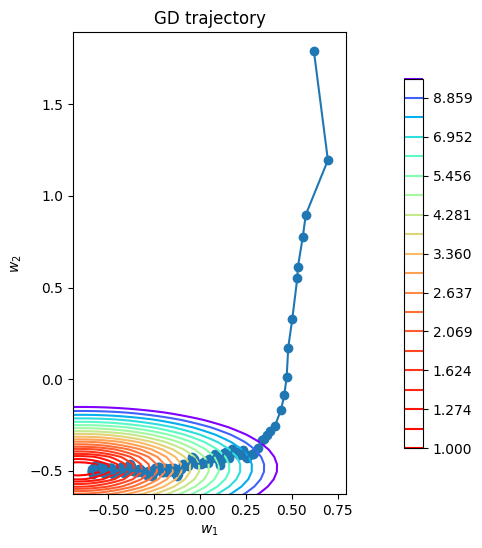

Batch size:  5 Learning rate:  0.01


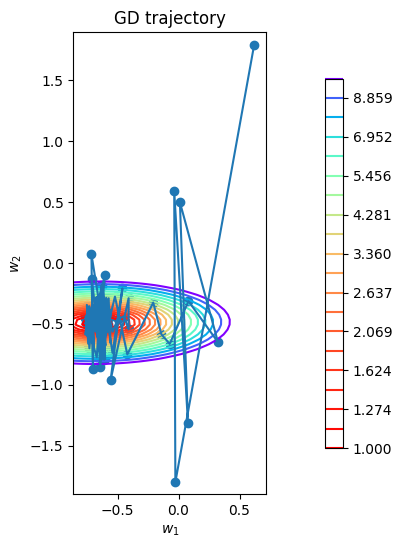

Batch size:  5 Learning rate:  0.02


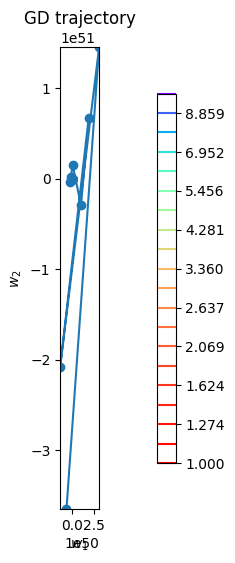

Batch size:  10 Learning rate:  0.0001


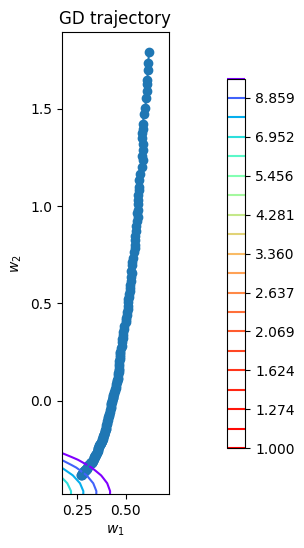

Batch size:  10 Learning rate:  0.001


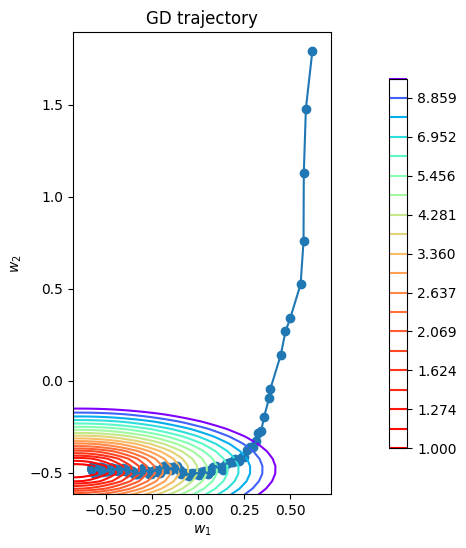

Batch size:  10 Learning rate:  0.01


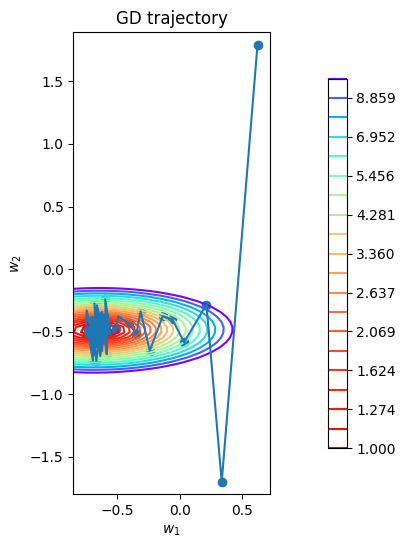

Batch size:  10 Learning rate:  0.02


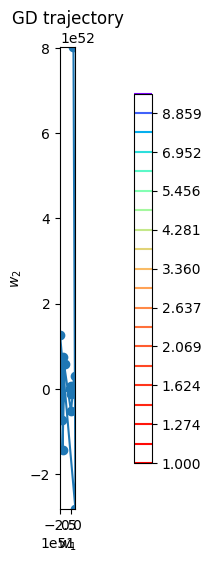

Batch size:  20 Learning rate:  0.0001


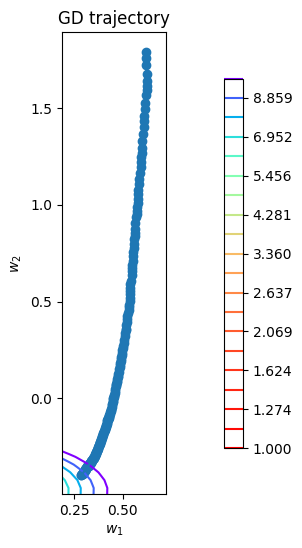

Batch size:  20 Learning rate:  0.001


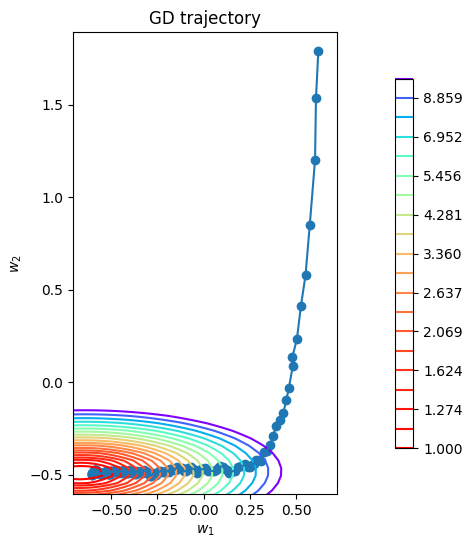

Batch size:  20 Learning rate:  0.01


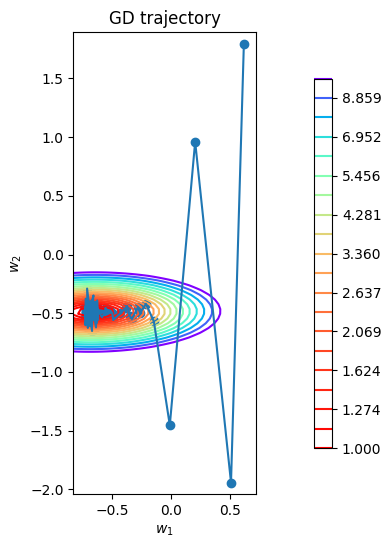

Batch size:  20 Learning rate:  0.02


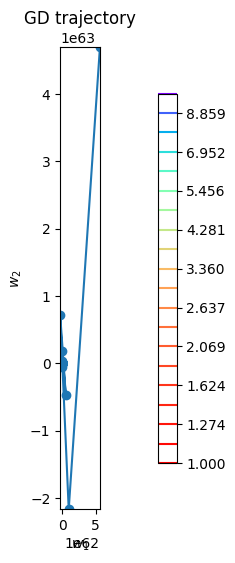

Batch size:  50 Learning rate:  0.0001


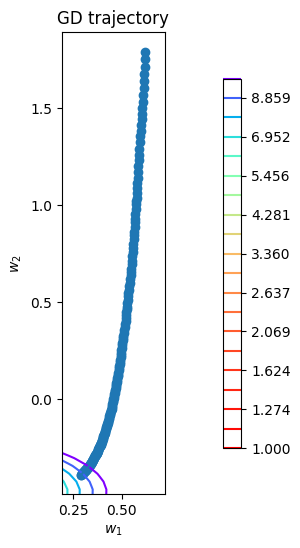

Batch size:  50 Learning rate:  0.001


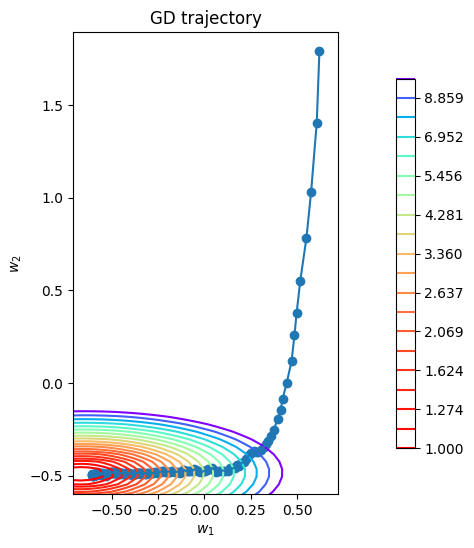

Batch size:  50 Learning rate:  0.01


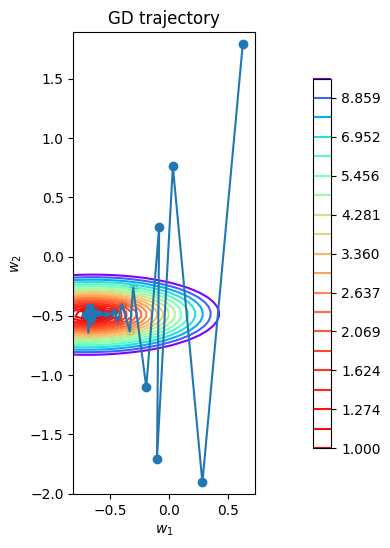

Batch size:  50 Learning rate:  0.02


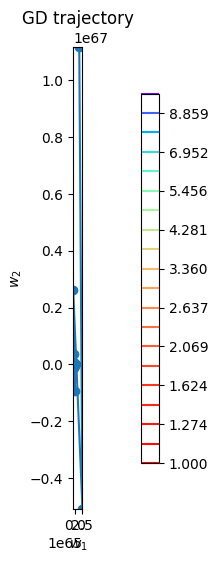

In [102]:
learning_rates = [0.0001, 0.001, 0.01, 0.02]
batch_sizes = [1, 5, 10, 20, 50]
for bs in batch_sizes:
    for lr in learning_rates:
        print("Batch size: ", bs, "Learning rate: ", lr)
        plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, bs, 200), X, y, loss)

Чем больше batch_size, тем градиентный спуск идет более "ровно" и "уверенно" в правильном направлении. В обычном градиентном спуске из-за использования целой выборки при вычислении градиента происходит меньшее количество колебаний и отклонений. Когда batch_size = 1, то один объект (различный на каждом шаге) не дает представление о всей выборке и алгоритм расходится, хотя с lr=0.01 нам даже удалось приблизиться в сторону минимума. При увеличении batch_size алгоритм сходится все лучше и лучше. При batch_size >= 10 различия уже не так видны, хотя в окрестности минимума происходит меньше колебаний при увеличении batch_size. А вот при batch_size = 50 уже очень близко к полному градиентному спуску. Learning rate влияет также, как и при обычном градиентном спуске: при слишком маленьких значениях он требует сильно больше шагов для того, чтобы сойтись, а при больших - он начинает проскакивать минимум.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы точнее этого минимума достигнуть и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [12]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float - параметр величины шага, на который нужно домножать градиент
    :param batch_size: int - размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float - значение степени в формуле затухания длины шага
    :param n_iterations: int - сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    w_t = w_init.copy()
    weights_on_iterations = [w_t.copy()]
    bs = min(batch_size, X.shape[0])
    for t in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=bs, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        eta = lr * (1.0/(1.0+t)) ** p
        w_t -= eta * loss.calc_grad(X_batch, y_batch, w_t)
        weights_on_iterations.append(w_t.copy())
    return weights_on_iterations

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска. Что происходит при маленьком или большом значении p?

p:  0.1


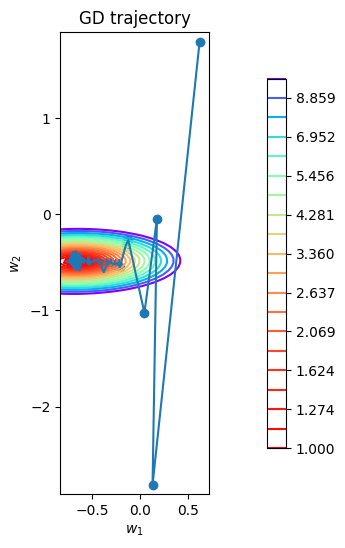

p:  0.3


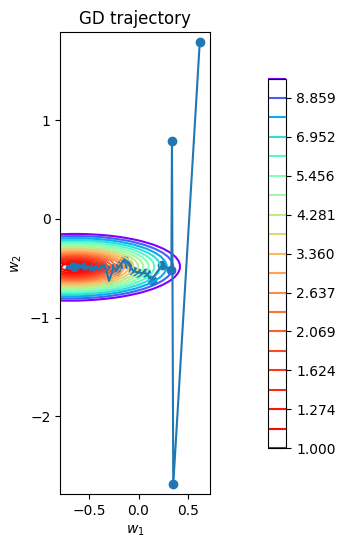

p:  0.4


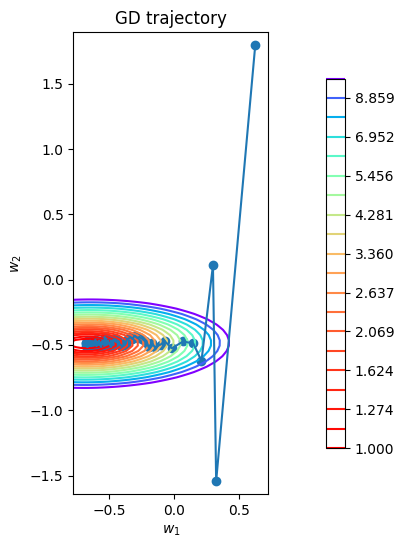

p:  0.6


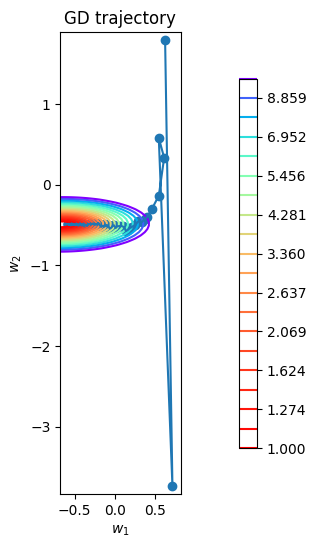

p:  1


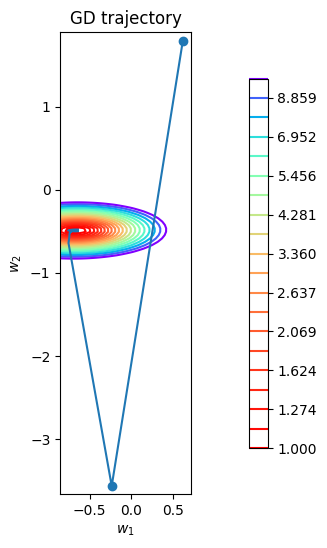

In [13]:
ps = [0.1, 0.3, 0.4, 0.6, 1]
for p in ps:
    print("p: ", p)
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 200), X, y, loss)

При больших p шаг уменьшается быстрее, поэтому ближе к минимуму шаги становятся слишком маленькими, и чтобы алгоритм сошелся нужно слишком значительное большее кол-во шагов. А при слишком маленьких p шаг так сильно не уменьшается => даже при приближении к минимуму шаг еще несильно уменьшился и в окрестности минимума наблюдаются "колебания".

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

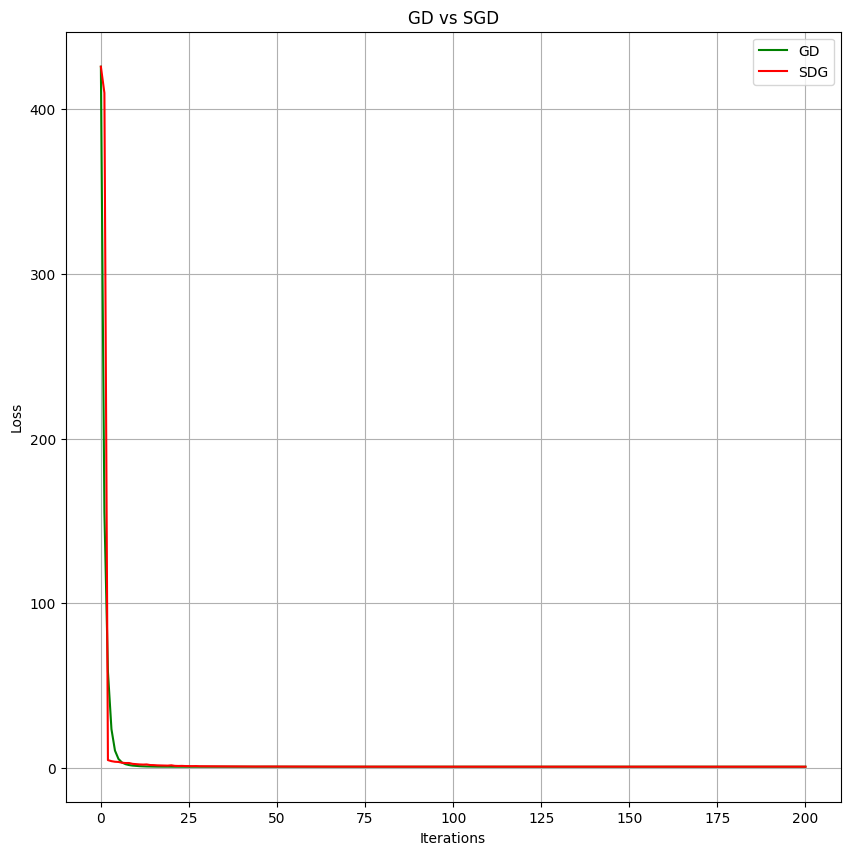

In [14]:
g_d_weights = gradient_descent(w_init, X, y, loss, 0.01, 200)
stochastic_g_d_weights = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.5, 200)
g_d_loss = [loss.calc_loss(X, y, g_d_weights[i]) for i in range(len(g_d_weights))]
stochastic_g_d_loss = [loss.calc_loss(X, y, stochastic_g_d_weights[i]) for i in range(len(stochastic_g_d_weights))]

plt.figure(figsize=(10, 10))
plt.title("GD vs SGD")
plt.plot(np.arange(len(g_d_loss)), g_d_loss, label="GD", color="green")
plt.plot(np.arange(len(stochastic_g_d_loss)), stochastic_g_d_loss, label="SDG", color="red")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

Графики почти одинаковы. Да там вначале график SGD лежит чуть ниже графика SG, но потом они оба одинаково стремятся к нулю. Самое главное преимущество SGD - его скорость, так как мы работаем не со всеми данными при вычислении градиента, и на графике это не увидеть.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`.

В методе `predict` мы будем применять нашу регрессию к датасету.

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`.

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [51]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.01) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w_init = np.random.rand(X.shape[1])
        weights = gradient_descent(w_init, X, y, self.loss, self.lr)
        self.w = weights[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [52]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [53]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [54]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [55]:
X_raw.sample(3)

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
113,116,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,...,four,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33
132,136,3,150.0,saab,gas,turbo,two,hatchback,fwd,front,...,four,121,mpfi,3.54,3.07,9.0,160.0,5500.0,19,26
177,181,-1,NaN,toyota,gas,std,four,wagon,rwd,front,...,six,161,mpfi,3.27,3.35,9.2,156.0,5200.0,19,24


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [56]:
# датасет уже разделили, посмотрим есть ли пропуски
X_raw.isna().sum()
# в y пропуски обработали выше

index     0
0         0
1        37
2         0
3         0
4         0
5         2
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        4
19        4
20        0
21        2
22        2
23        0
24        0
dtype: int64

In [57]:
# есть пропуски для двух признаков 1 и 5
X_prepared = X_raw
X_prepared.drop('index', axis=1, inplace=True)
# признаки числовые заменим на среднее, а категориальные - на самое часто встречающееся
for col in X_prepared.columns:
    if X_prepared[col].isna().any():
        if X_prepared[col].dtype == 'object':
            X_prepared[col] = X_prepared[col].fillna(X_prepared[col].mode()[0])
        else:
            X_prepared[col] = X_prepared[col].fillna(X_prepared[col].mean())

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2)

In [59]:
# закодируем категориальные переменные
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

categorical_cols = ['2', '3', '4', '5', '6', '7', '8', '14', '15', '17']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_cols)
    ],
    remainder='passthrough'
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [61]:
linear_regression.fit(X_train_scaled, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [62]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, linear_regression.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, linear_regression.predict(X_test_scaled))

print(f'MSE train: {mse_train}, MSE test: {mse_test}')

MSE train: 2063364.984573391, MSE test: 4685282.087531698


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации.

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`.

Он должен вычислять лосс и градиент по формулам выше.

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`.

In [63]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_featurees) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return 1/X.shape[0] * np.linalg.norm(X.dot(w) - y)**2 + self.coef * np.linalg.norm(w[:-1])**2

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        grad = 2/X.shape[0] * X.T.dot(X.dot(w) - y)
        red_grad = 2 * self.coef * w
        red_grad[-1] = 0
        return grad + red_grad

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [64]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

Best coef: 0.1
Test MSE with regularization: 4363862.9127
Test MSE without regularization: 4685086.3109


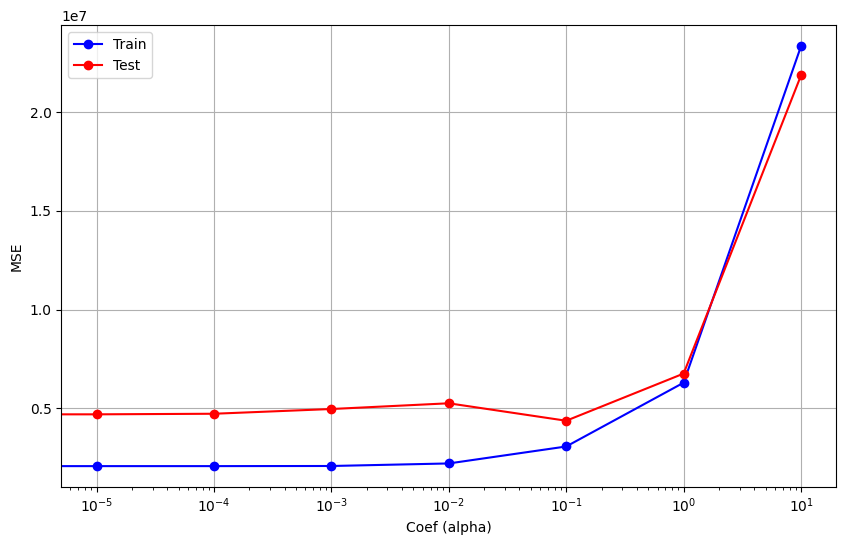

In [65]:
# Подбор коэффициента регуляризации
alphas = [0, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10]
train_errors = []
test_errors = []

for a in alphas:
    model = LinearRegression(MSEL2Loss(a))
    model.fit(X_train_scaled, y_train)
    train_errors.append(mean_squared_error(model.predict(X_train_scaled), y_train))
    test_errors.append(mean_squared_error(model.predict(X_test_scaled), y_test))

# Находим лучший коэффициент
best_idx = np.argmin(test_errors)
best_alpha = alphas[best_idx]

# Сравнение результатов
print(f"Best coef: {best_alpha}")
print(f"Test MSE with regularization: {test_errors[best_idx]:.4f}")
print(f"Test MSE without regularization: {test_errors[0]:.4f}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_errors, 'b-o', label='Train')
plt.semilogx(alphas, test_errors, 'r-o', label='Test')
plt.xlabel('Coef (alpha)')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

Видно, что значение MSE уменьшилось по сравнению с MSE на тестовой выборке без регуляризации. И лучше всего подходит alpha=0.1.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`.

Он должен вычислять лосс и градиент по формулам выше.

In [67]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = X.dot(w) - y
        mask = np.abs(z) < self.eps
        loss = np.where(mask, 0.5 * z**2, self.eps * (np.abs(z) - 0.5 * self.eps))
        return np.mean(loss)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = X.dot(w) - y
        mask = np.abs(z) < self.eps
        grad_z = np.where(mask, z, self.eps * np.sign(z))
        return X.T.dot(grad_z) / X.shape[0]

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [91]:
huber_lin_reg = LinearRegression(HuberLoss(3000))
huber_lin_reg.fit(X_train_scaled, y_train)

mse_train = mean_squared_error(y_train, huber_lin_reg.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, huber_lin_reg.predict(X_test_scaled))

print(f'MSE train: {mse_train}, MSE test: {mse_test}')

MSE train: 2246234.362938775, MSE test: 3821743.9032599707


In [87]:
mse_lin_reg = LinearRegression(MSELoss())
mse_lin_reg.fit(X_train_scaled, y_train)

mse_train = mean_squared_error(y_train, mse_lin_reg.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, mse_lin_reg.predict(X_test_scaled))

print(f'MSE train: {mse_train}, MSE test: {mse_test}')

MSE train: 2063364.9861916811, MSE test: 4685155.677596439


### БОНУС (2 балла)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2 балла)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределения с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [193]:
def simulated_annealing(
        X: np.ndarray,
        y: np.ndarray,
        loss: BaseLoss,
        initial_temp=50.0,
        alpha=0.99,
        n_iterations: int = 1000,
):
    """
    Функция имитации отжига
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param initial_temp: float -- начальное значение "температуры"
    :param alpha: float -- параметр, ответственный за убывание последовательности "температур"
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    и историю loss на всех итерациях
    """
    w = np.random.randn(X.shape[1])
    loss_history = [loss.calc_loss(X, y, w)]
    temp = initial_temp

    for _ in range(n_iterations):
        new_w = w + np.random.standard_t(df=3, size=w.shape) * temp
        loss_old = loss.calc_loss(X, y, w)
        loss_new = loss.calc_loss(X, y, new_w)

        if loss_new < loss_old:
            w = new_w
        else:
            if np.random.rand() < np.exp(-(loss_new - loss_old) / temp):
                w = new_w

        temp *= alpha
        loss_history.append(loss.calc_loss(X, y, w))

    return w, loss_history

Сначала посмотрим на графики зависимости лосса от номера итерации на "искусственном" наборе данных:

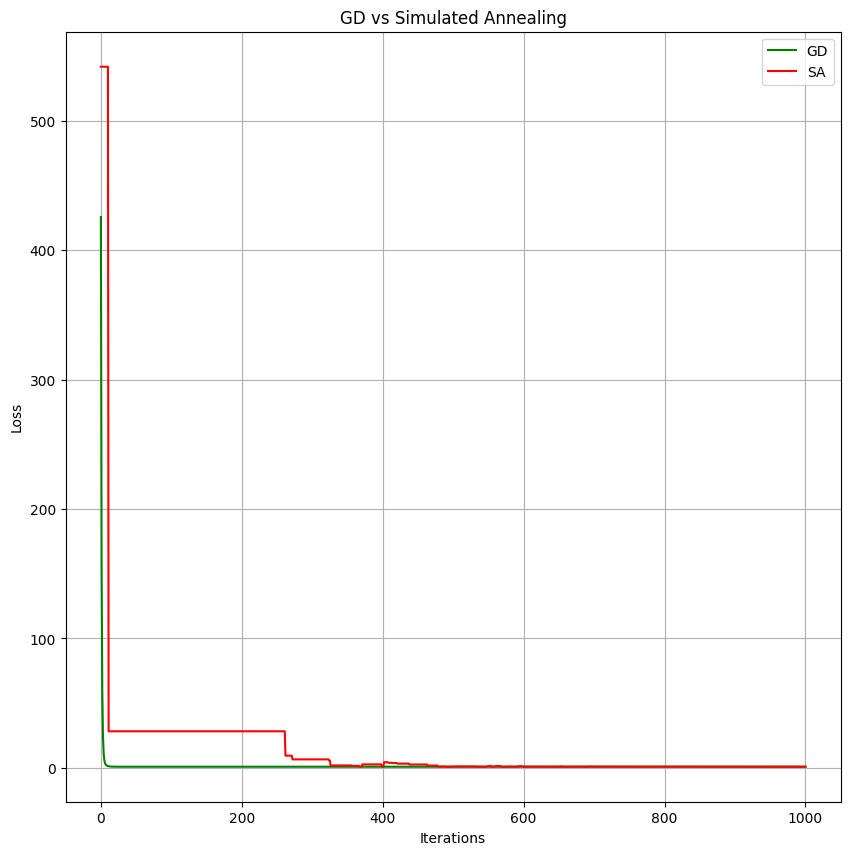

In [195]:
# построим график лосса в зависимости от номера итерации
g_d_weights = gradient_descent(w_init, X, y, loss, 0.01, 1000)
g_d_loss = [loss.calc_loss(X, y, g_d_weights[i]) for i in range(len(g_d_weights))]

a_s_w, a_s_loss = simulated_annealing(X=X, y=y, loss=MSELoss())

plt.figure(figsize=(10, 10))
plt.title("GD vs Simulated Annealing")
plt.plot(np.arange(len(g_d_loss)), g_d_loss, label="GD", color="green")
plt.plot(np.arange(len(a_s_loss)), a_s_loss, label="SA", color="red")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

После 500й итерации они сходятся к одному и тому же. Но в алгоритме имитации отжига видно присутствие "ступенек", где как раз веса не меняются. Обычный градиентный спуск сошелся быстрее.

А теперь посмотрим на датасете, на котором мы обучали линейную регрессию:

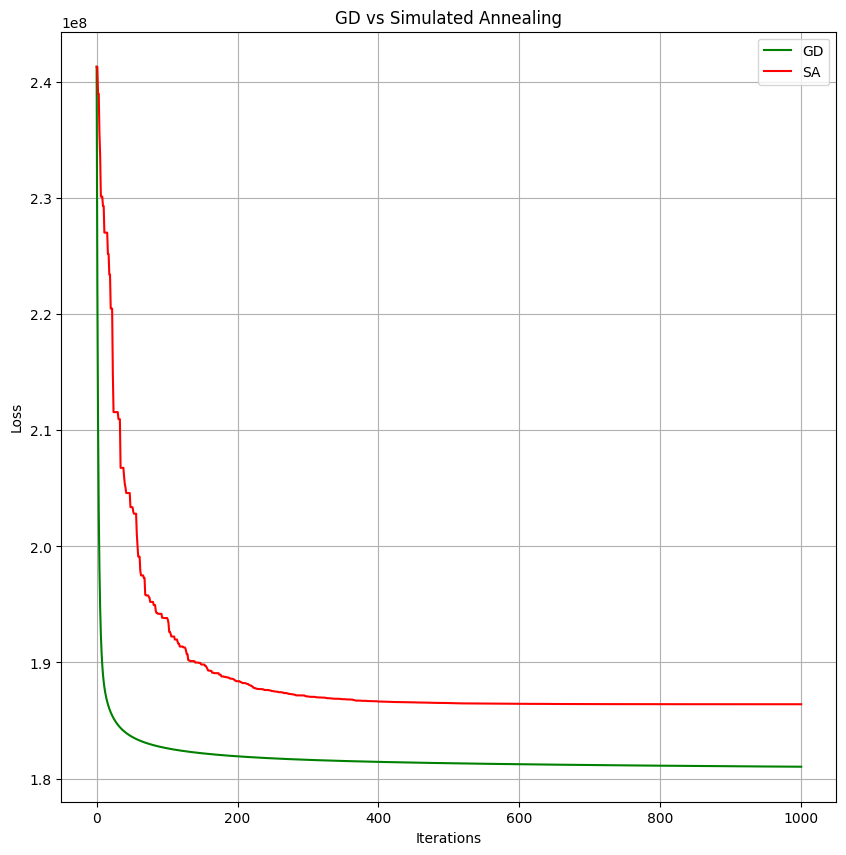

In [199]:
# построим график лосса в зависимости от номрера итерации
g_d_weights = gradient_descent(np.zeros(X_train_scaled.shape[1]), X_train_scaled, y_train, loss, 0.01, 1000)
g_d_loss = [loss.calc_loss(X_train_scaled, y_train, g_d_weights[i]) for i in range(len(g_d_weights))]

a_s_w, a_s_loss = simulated_annealing(X=X_train_scaled, y=y_train, loss=MSELoss())

plt.figure(figsize=(10, 10))
plt.title("GD vs Simulated Annealing")
plt.plot(np.arange(len(g_d_loss)), g_d_loss, label="GD", color="green")
plt.plot(np.arange(len(a_s_loss)), a_s_loss, label="SA", color="red")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

Тут все также, только алгоритм имитации отжига хуже сходится.